<h3> importing libraries</h3>

In [1]:
from scipy.stats import norm
import random
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

<h3> given script for generating data</h3>

In [2]:

id_1 = 7455 #change to first student id
id_2 = 7880 #change to second student id
id_3 = 7734 #change to third student id "leave 0000 if team of 2"
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="data.csv"#replace with data path
output_path="your_data.csv"#replace with output data path

all_data=pd.read_csv(data_path) 
all_columns = all_data.columns.tolist()

target_column = 'smoking'  

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST

['eyesight(left)', 'systolic', 'serum creatinine', 'triglyceride', 'Cholesterol', 'AST', 'height(cm)', 'waist(cm)', 'age', 'LDL']


<h3>read data</h3>

In [32]:
all_data=pd.read_csv("your_data.csv")
all_data.drop(all_data.columns[0], axis=1,inplace=True)
all_data.head()
data, test = train_test_split(all_data, test_size=0.3, random_state=10, stratify=all_data['smoking'])
X_train=data.drop('smoking', axis=1)
Y_train = data['smoking']
data.shape
print(X_train.shape)
print(Y_train.shape)

(111479, 10)
(111479,)


In [4]:
data.describe()

eyesight(left)       systolic  serum creatinine   triglyceride  \
count   111479.000000  111479.000000     111479.000000  111479.000000   
mean         1.005783     122.521264          0.892494     127.822245   
std          0.405810      12.704048          0.178971      66.323761   
min          0.100000      79.000000          0.100000       8.000000   
25%          0.800000     114.000000          0.800000      77.000000   
50%          1.000000     121.000000          0.900000     115.000000   
75%          1.200000     130.000000          1.000000     165.000000   
max          9.900000     203.000000          9.900000     766.000000   

         Cholesterol            AST     height(cm)      waist(cm)  \
count  111479.000000  111479.000000  111479.000000  111479.000000   
mean      195.842464      25.533464     165.257663      82.999307   
std        28.393071       9.582325       8.821466       8.941239   
min        77.000000       6.000000     135.000000      51.000000   
25%       175.000000      20.000000     160.000000      77.000000   
50%       196.000000      24.000000     165.000000      83.000000   
75%       217.000000      29.000000     170.000000      89.000000   
max       393.000000     778.000000     190.000000     125.800000   

                 age            LDL        smoking  
count  111479.000000  111479.000000  111479.000000  
mean       44.319361     114.634075       0.437365  
std        11.841011      27.573093       0.496064  
min        20.000000       1.000000       0.000000  
25%        40.000000      95.000000       0.000000  
50%        40.000000     114.000000       0.000000  
75%        55.000000     133.000000       1.000000  
max        85.000000    1660.000000       1.000000

<h4> univariate data analysis</h4>

In [5]:

non_smoking=data.loc[data['smoking']==0]
smoking=data.loc[data['smoking']==1]
print(non_smoking.shape)
print(smoking.shape)
print((non_smoking.shape[0]-smoking.shape[0])/(smoking.shape[0]))

(62722, 11)
(48757, 11)
0.28642041142810265


<p> number of non smokers in the dataset is more than number of smokers with about 28%</p>

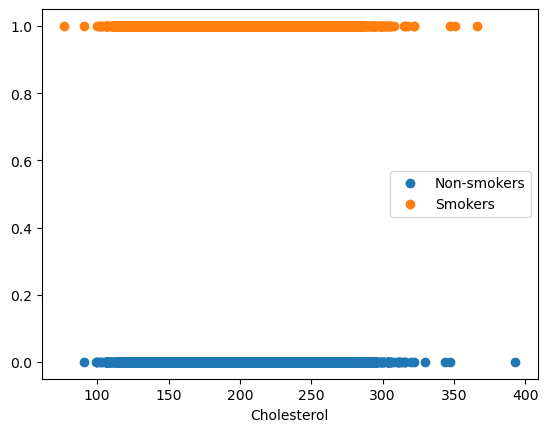

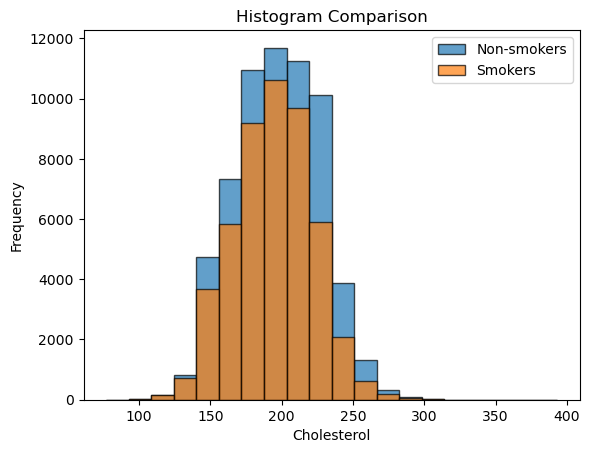

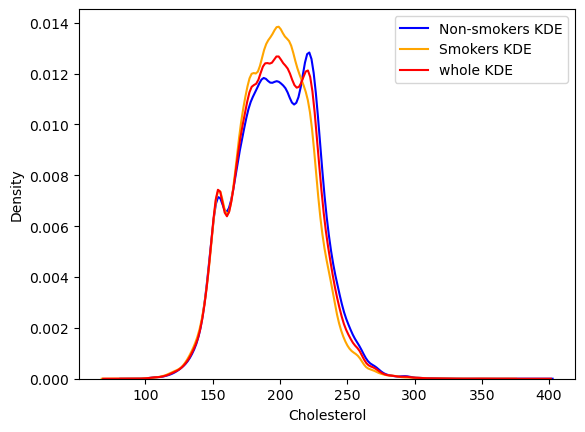

In [6]:
#cholesterol
plt.plot(non_smoking['Cholesterol'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['Cholesterol'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Cholesterol')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['Cholesterol']), min(smoking['Cholesterol'])),
                max(max(non_smoking['Cholesterol']), max(smoking['Cholesterol'])))
plt.hist(non_smoking['Cholesterol'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')

plt.hist(smoking['Cholesterol'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')

plt.legend()
plt.show()
sns.kdeplot(non_smoking['Cholesterol'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['Cholesterol'], color='orange', label='Smokers KDE')
sns.kdeplot(data['Cholesterol'], color='red', label='whole KDE')
plt.xlabel('Cholesterol')
plt.ylabel('Density') 


plt.legend()
plt.show()

<h4> observation</h4>
<p>smokers and non smokers nearly have the same distribution and the diffrences because non smokers number of samples is more</p>

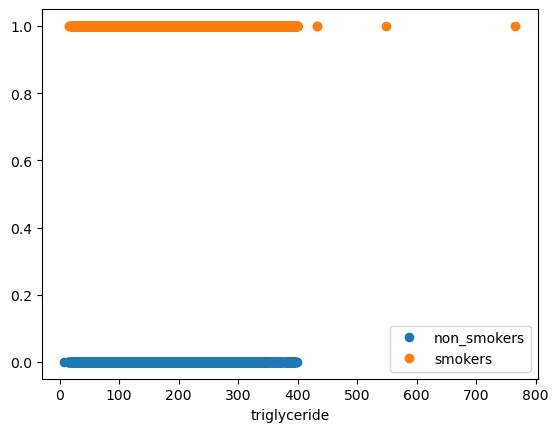

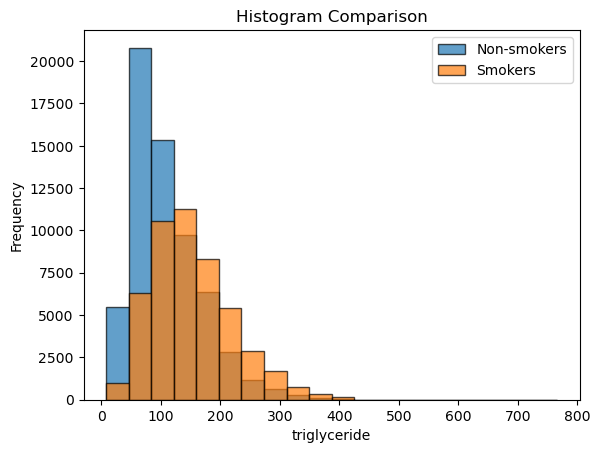

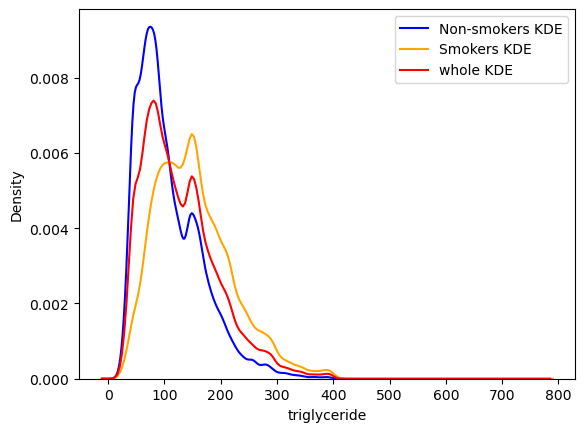

In [7]:
#triglyceride
plt.plot(non_smoking['triglyceride'],np.zeros(len(non_smoking)), 'o',label='non_smokers')
plt.plot(smoking['triglyceride'],np.ones(len(smoking)), 'o',label='smokers')
plt.xlabel('triglyceride')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['triglyceride']), min(smoking['triglyceride'])),
                max(max(non_smoking['triglyceride']), max(smoking['triglyceride'])))
plt.hist(non_smoking['triglyceride'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['triglyceride'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('triglyceride')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['triglyceride'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['triglyceride'], color='orange', label='Smokers KDE')
sns.kdeplot(data['triglyceride'], color='red', label='whole KDE')
plt.xlabel('triglyceride')
plt.ylabel('Density') 


plt.legend()
plt.show()

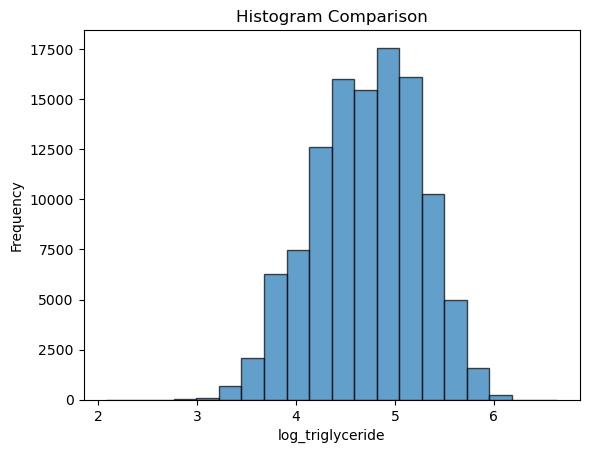

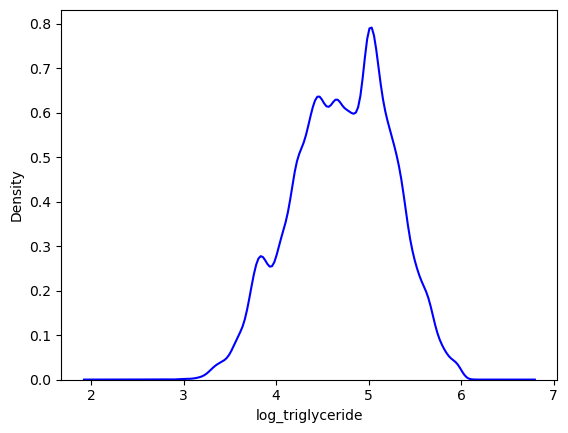

In [8]:
#try log function because distribution is skewed
#triglyceride
data['log_triglyceride']=np.log(data['triglyceride'])

plt.hist(data['log_triglyceride'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('log_triglyceride')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.show()
sns.kdeplot(data['log_triglyceride'], color='blue')
plt.xlabel('log_triglyceride')
plt.ylabel('Density') 
plt.show()

<p>log function has a better distribution</p>
<h4> observation</h4>
<p>non smoker are more concentrated in the left of the histogram and smokers have higher percentage after 100</p>

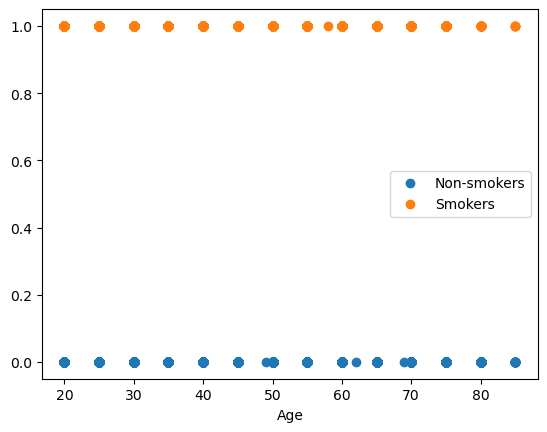

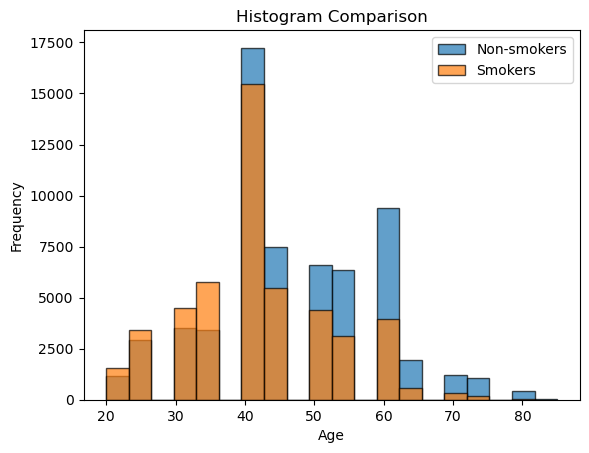

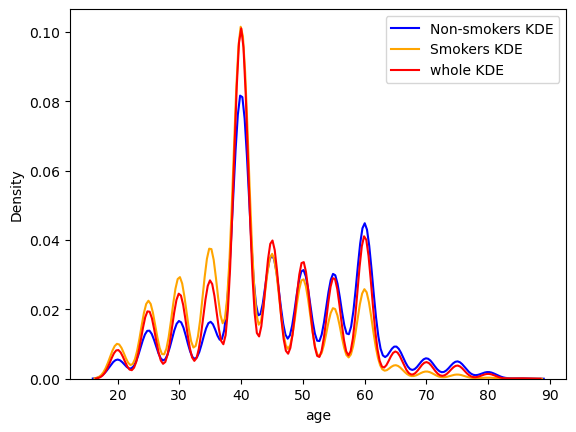

In [9]:
# age
plt.plot(non_smoking['age'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['age'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Age')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['age']), min(smoking['age'])),
                max(max(non_smoking['age']), max(smoking['age'])))
plt.hist(non_smoking['age'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['age'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['age'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['age'], color='orange', label='Smokers KDE')
sns.kdeplot(data['age'], color='red', label='whole KDE')
plt.xlabel('age')
plt.ylabel('Density') 


plt.legend()
plt.show()

<h4> observation</h4>
<p>smokers have higher percentage in the ages less than 40</p>

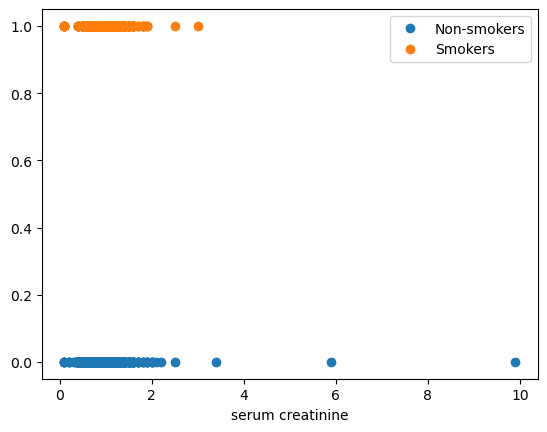

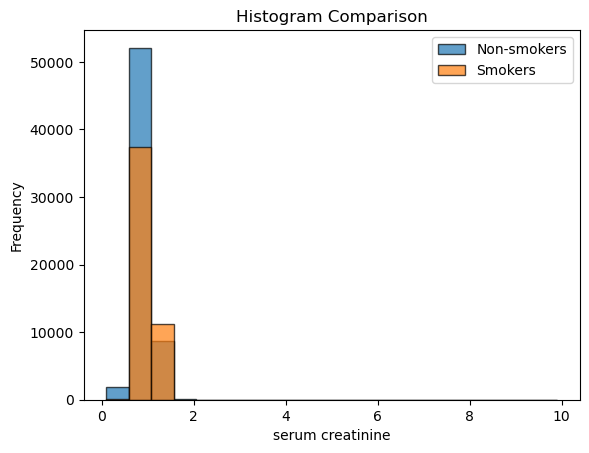

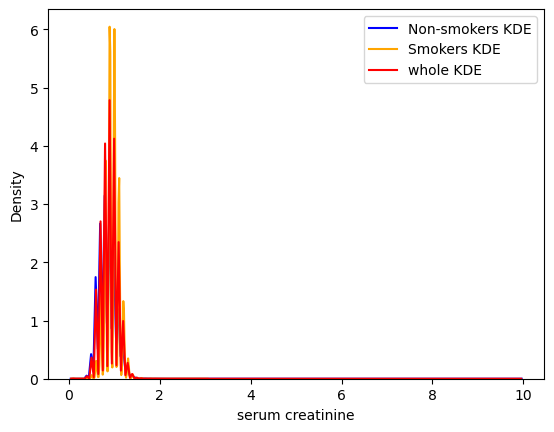

In [10]:
#serum creatinine
plt.plot(non_smoking['serum creatinine'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['serum creatinine'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('serum creatinine')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['serum creatinine']), min(smoking['serum creatinine'])),
                max(max(non_smoking['serum creatinine']), max(smoking['serum creatinine'])))
plt.hist(non_smoking['serum creatinine'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['serum creatinine'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('serum creatinine')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['serum creatinine'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['serum creatinine'], color='orange', label='Smokers KDE')
sns.kdeplot(data['serum creatinine'], color='red', label='whole KDE')
plt.xlabel('serum creatinine')
plt.ylabel('Density') 


plt.legend()
plt.show()

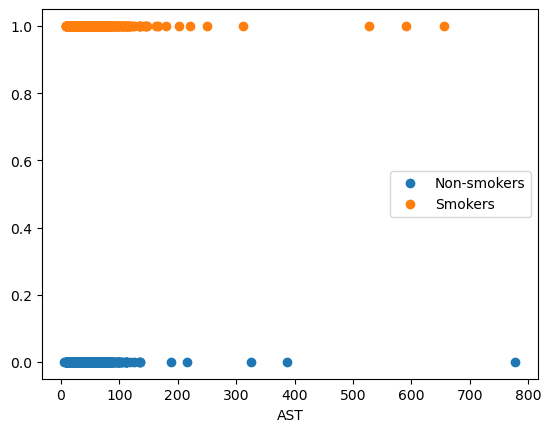

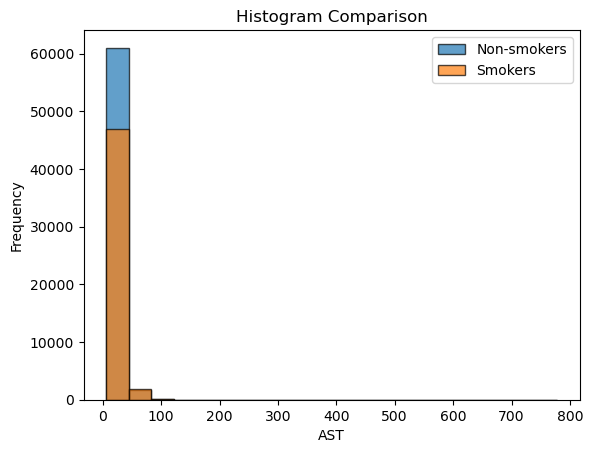

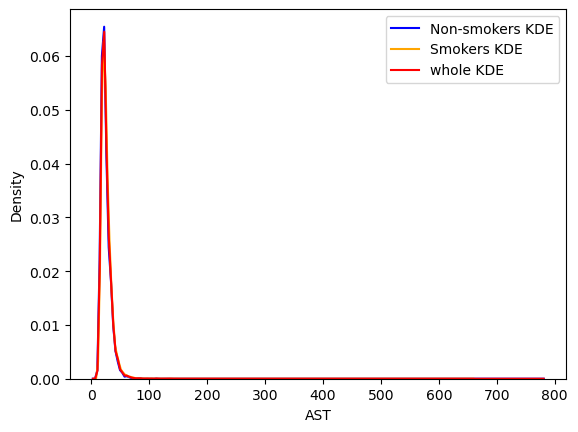

In [11]:
# AST
plt.plot(non_smoking['AST'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['AST'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('AST')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['AST']), min(smoking['AST'])),
                max(max(non_smoking['AST']), max(smoking['AST'])))
plt.hist(non_smoking['AST'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['AST'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('AST')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['AST'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['AST'], color='orange', label='Smokers KDE')
sns.kdeplot(data['AST'], color='red', label='whole KDE')
plt.xlabel('AST')
plt.ylabel('Density') 


plt.legend()
plt.show()

<h4> observation</h4>
<p>most values between 0 and 100</p>

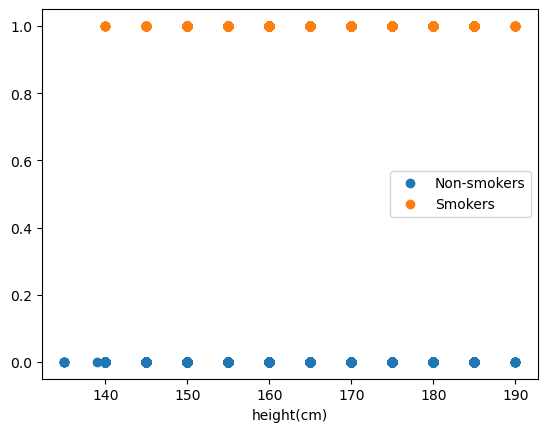

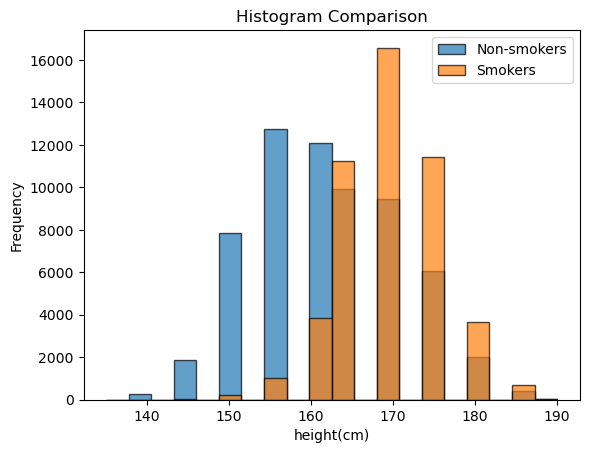

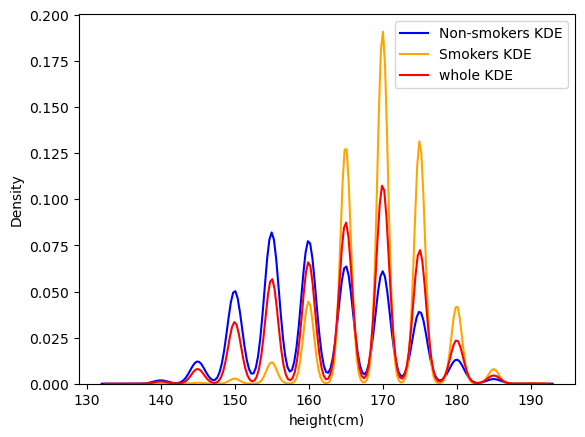

In [12]:
# height(cm)
plt.plot(non_smoking['height(cm)'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['height(cm)'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('height(cm)')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['height(cm)']), min(smoking['height(cm)'])),
                max(max(non_smoking['height(cm)']), max(smoking['height(cm)'])))

plt.hist(non_smoking['height(cm)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['height(cm)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('height(cm)')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['height(cm)'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['height(cm)'], color='orange', label='Smokers KDE')
sns.kdeplot(data['height(cm)'], color='red', label='whole KDE')
plt.xlabel('height(cm)')
plt.ylabel('Density') 


plt.legend()
plt.show()

looks like age distribution

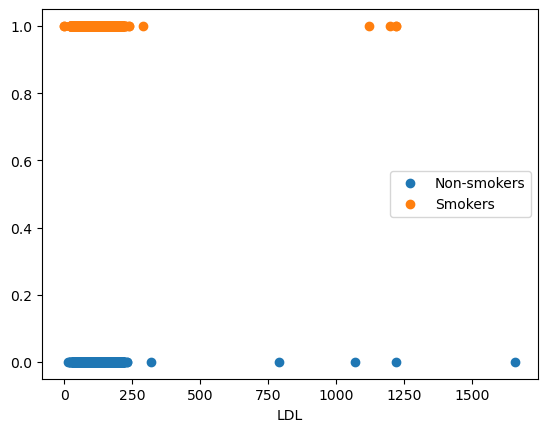

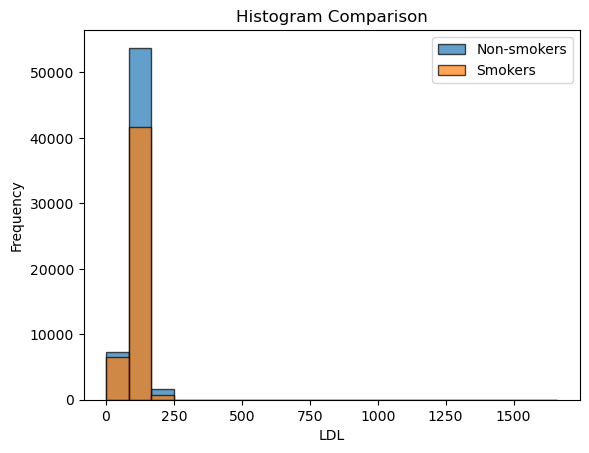

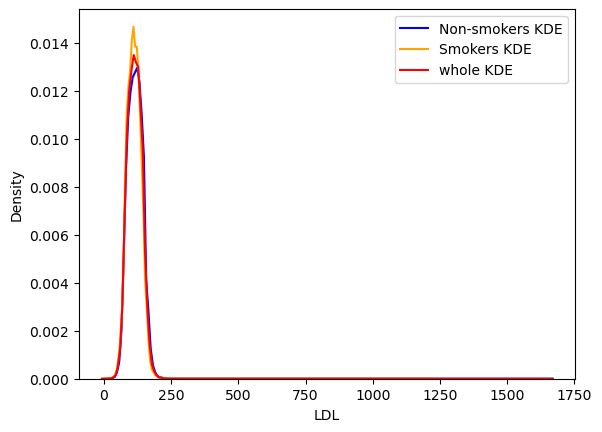

In [13]:
#LDL
plt.plot(non_smoking['LDL'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['LDL'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('LDL')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['LDL']), min(smoking['LDL'])),
                max(max(non_smoking['LDL']), max(smoking['LDL'])))

plt.hist(non_smoking['LDL'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['LDL'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('LDL')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['LDL'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['LDL'], color='orange', label='Smokers KDE')
sns.kdeplot(data['LDL'], color='red', label='whole KDE')
plt.xlabel('LDL')
plt.ylabel('Density') 


plt.legend()
plt.show()

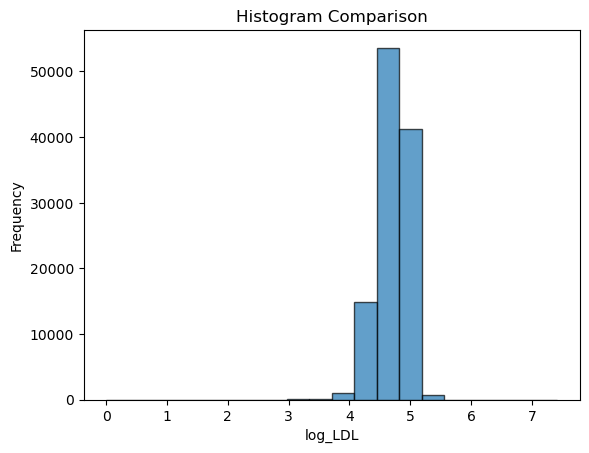

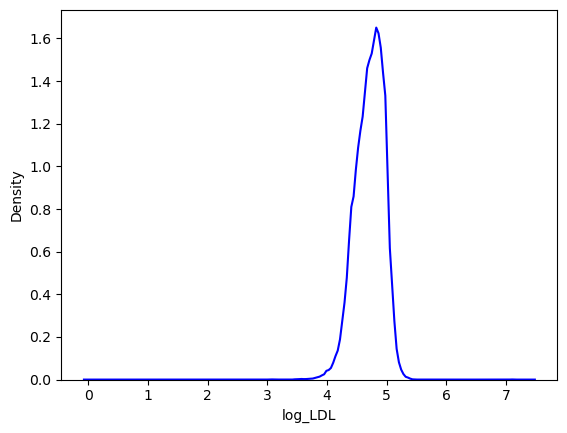

In [14]:
#try log because distribution is skewed
data['log_LDL']=np.log(data['LDL'])

plt.hist(data['log_LDL'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('log_LDL')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.show()
sns.kdeplot(data['log_LDL'], color='blue')
plt.xlabel('log_LDL')
plt.ylabel('Density') 
plt.show()
data.drop('log_LDL',axis=1,inplace=True)

<p>no diffrence between log function dis. and feature distribution</p>

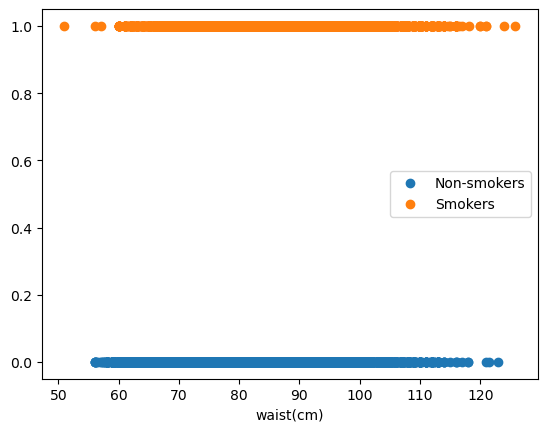

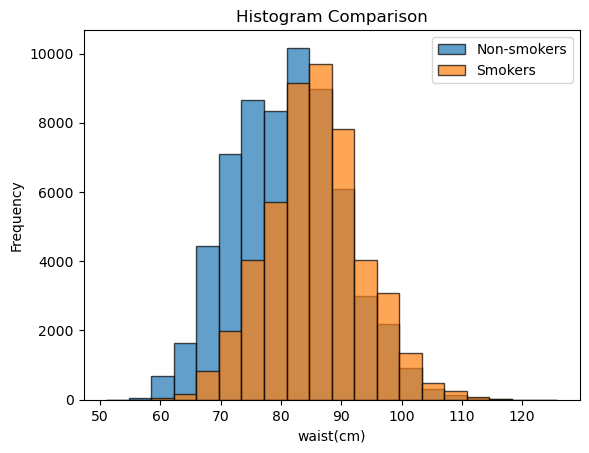

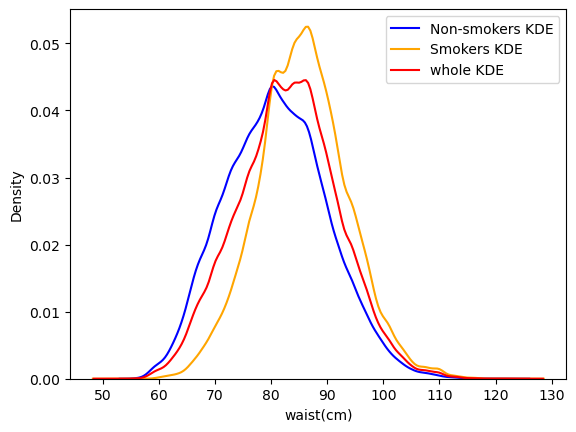

In [15]:
# waist(cm)
plt.plot(non_smoking['waist(cm)'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['waist(cm)'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('waist(cm)')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['waist(cm)']), min(smoking['waist(cm)'])),
                max(max(non_smoking['waist(cm)']), max(smoking['waist(cm)'])))

plt.hist(non_smoking['waist(cm)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['waist(cm)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('waist(cm)')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['waist(cm)'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['waist(cm)'], color='orange', label='Smokers KDE')
sns.kdeplot(data['waist(cm)'], color='red', label='whole KDE')
plt.xlabel('waist(cm)')
plt.ylabel('Density') 


plt.legend()
plt.show()

smokers have higher percentages with sizes bigger than 90

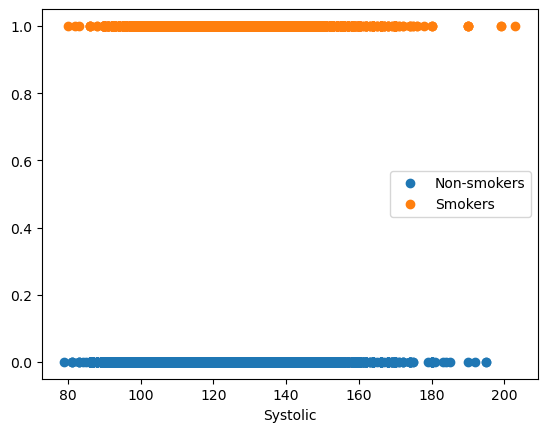

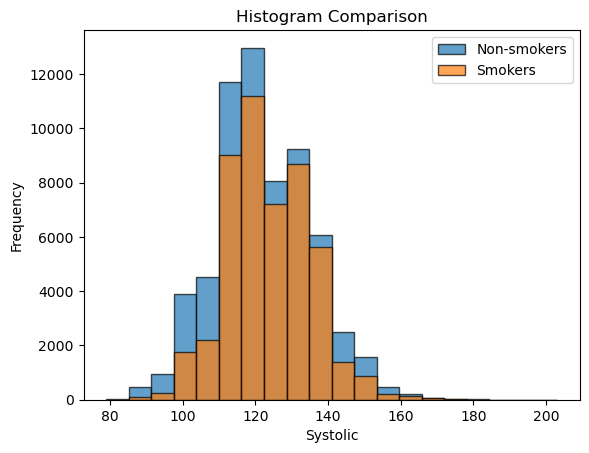

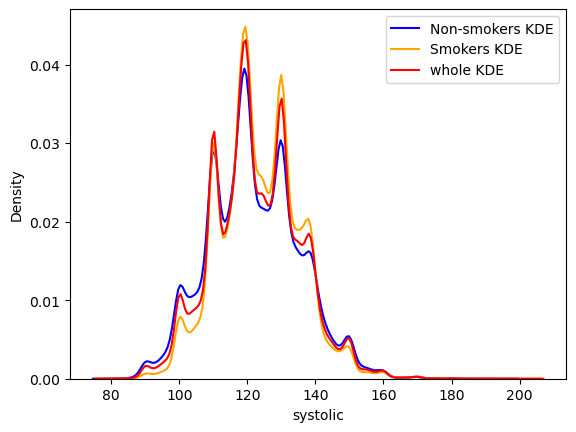

In [16]:
# systolic
plt.plot(non_smoking['systolic'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['systolic'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Systolic')
plt.legend()
plt.show()

common_range = (min(min(non_smoking['systolic']), min(smoking['systolic'])),
                max(max(non_smoking['systolic']), max(smoking['systolic'])))

plt.hist(non_smoking['systolic'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['systolic'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Systolic')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['systolic'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['systolic'], color='orange', label='Smokers KDE')
sns.kdeplot(data['systolic'], color='red', label='whole KDE')
plt.xlabel('systolic')
plt.ylabel('Density') 


plt.legend()
plt.show()

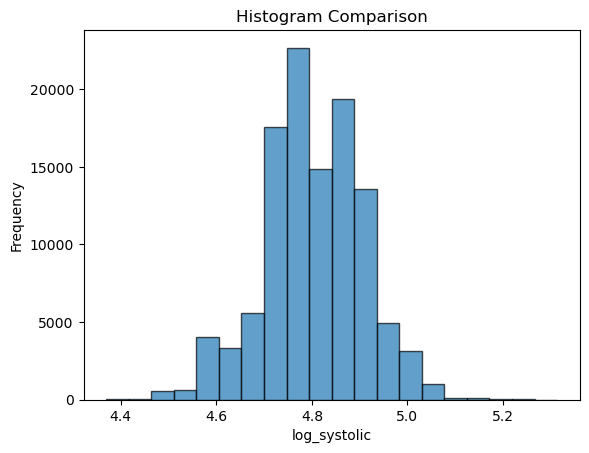

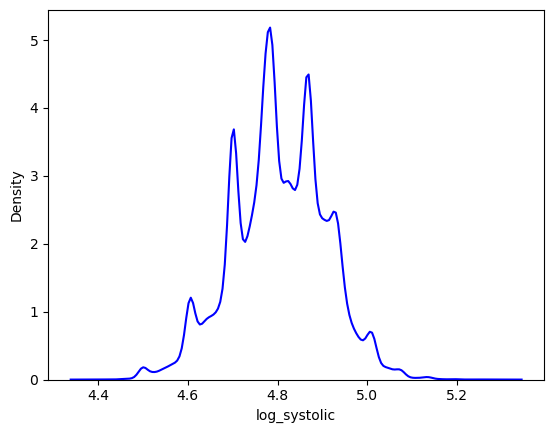

In [17]:
#try log because distribution is skewed
data['log_systolic']=np.log(data['systolic'])

plt.hist(data['log_systolic'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('log_systolic')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.show()
sns.kdeplot(data['log_systolic'], color='blue')
plt.xlabel('log_systolic')
plt.ylabel('Density') 
plt.show()
data.drop('log_systolic',axis=1,inplace=True)

<p>no diffrence between log function dis. and feature distribution</p>

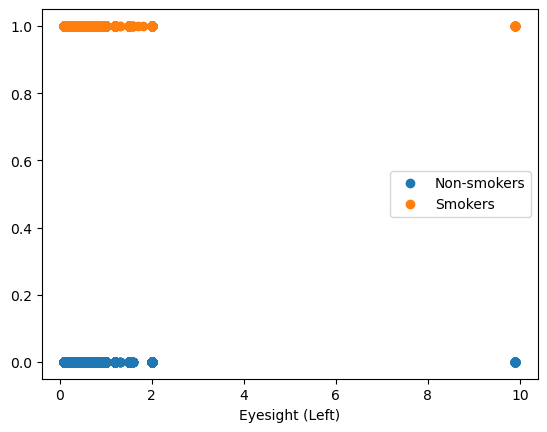

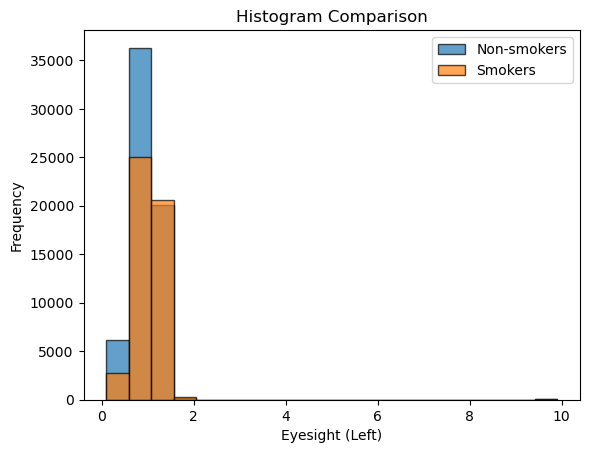

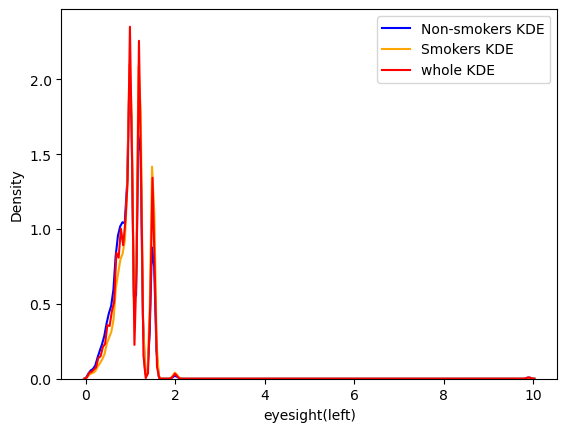

In [18]:
# eyesight(left)
plt.plot(non_smoking['eyesight(left)'], np.zeros(len(non_smoking)), 'o', label='Non-smokers')
plt.plot(smoking['eyesight(left)'], np.ones(len(smoking)), 'o', label='Smokers')
plt.xlabel('Eyesight (Left)')
plt.legend()
plt.show()
common_range = (min(min(non_smoking['eyesight(left)']), min(smoking['eyesight(left)'])),
                max(max(non_smoking['eyesight(left)']), max(smoking['eyesight(left)'])))

plt.hist(non_smoking['eyesight(left)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Non-smokers')
plt.hist(smoking['eyesight(left)'], bins=20, range=common_range, edgecolor='black', alpha=0.7, label='Smokers')

plt.xlabel('Eyesight (Left)')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()
sns.kdeplot(non_smoking['eyesight(left)'], color='blue', label='Non-smokers KDE')
sns.kdeplot(smoking['eyesight(left)'], color='orange', label='Smokers KDE')
sns.kdeplot(data['eyesight(left)'], color='red', label='whole KDE')
plt.xlabel('eyesight(left)')
plt.ylabel('Density') 


plt.legend()
plt.show()

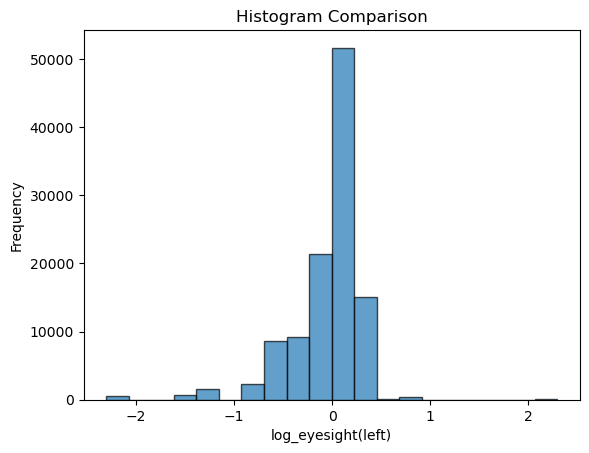

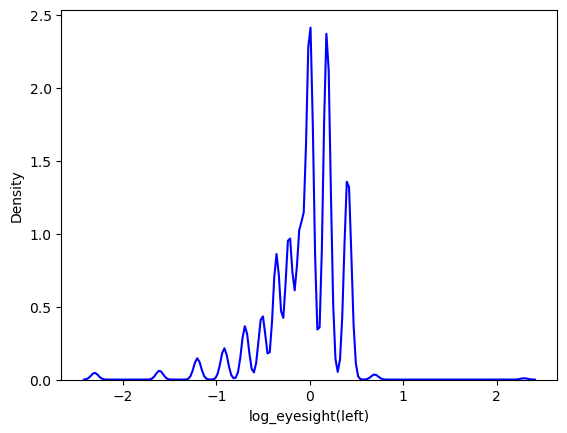

In [19]:
#try log because distribution is skewed
data['log_eyesight(left)']=np.log(data['eyesight(left)'])

plt.hist(data['log_eyesight(left)'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('log_eyesight(left)')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.show()
sns.kdeplot(data['log_eyesight(left)'], color='blue')
plt.xlabel('log_eyesight(left)')
plt.ylabel('Density') 
plt.show()
data.drop('log_eyesight(left)',axis=1,inplace=True)

<h3> bivariate data analysis</h3>
<p>correlation analysis to quantify the strength and direction of the linear relationship between two variables</p>

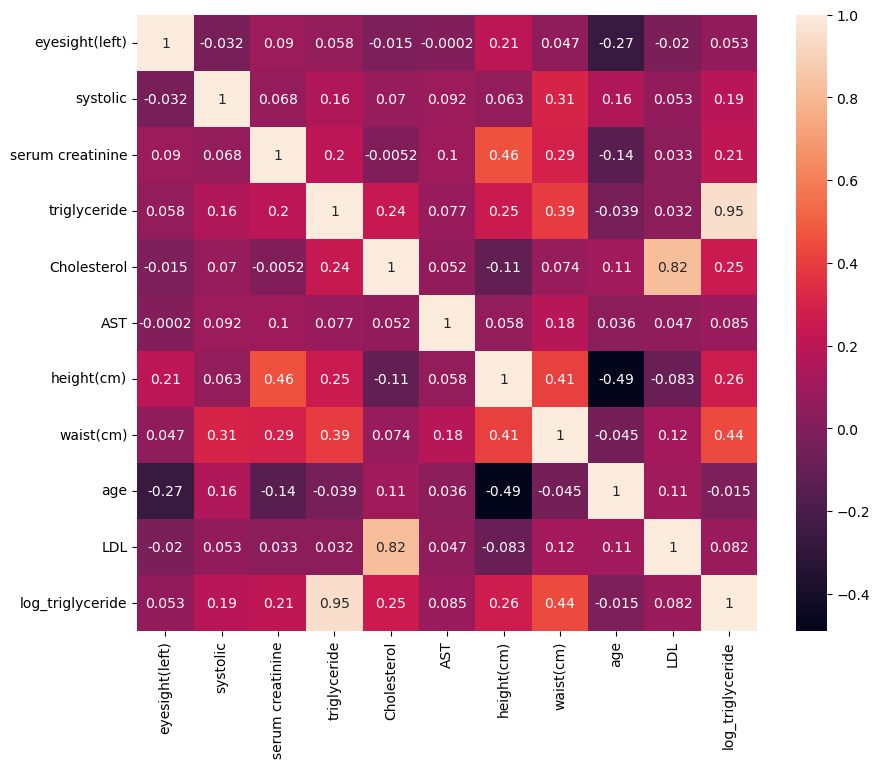

In [20]:


features=data.drop(['smoking'],axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(features.corr(),annot=True)
plt.show()

<h4> observation</h4>
<p>height is modeicorly correlated with serum</p>
<p>waist is modeicorly correlated with triglyceride</p>
<p>LDL is highly correlated with chelosterol</p>
<p> age have an effect on hemoglibin eyesight(left) hearing left and right</p>

<h3>multivariate analysis</h3>

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

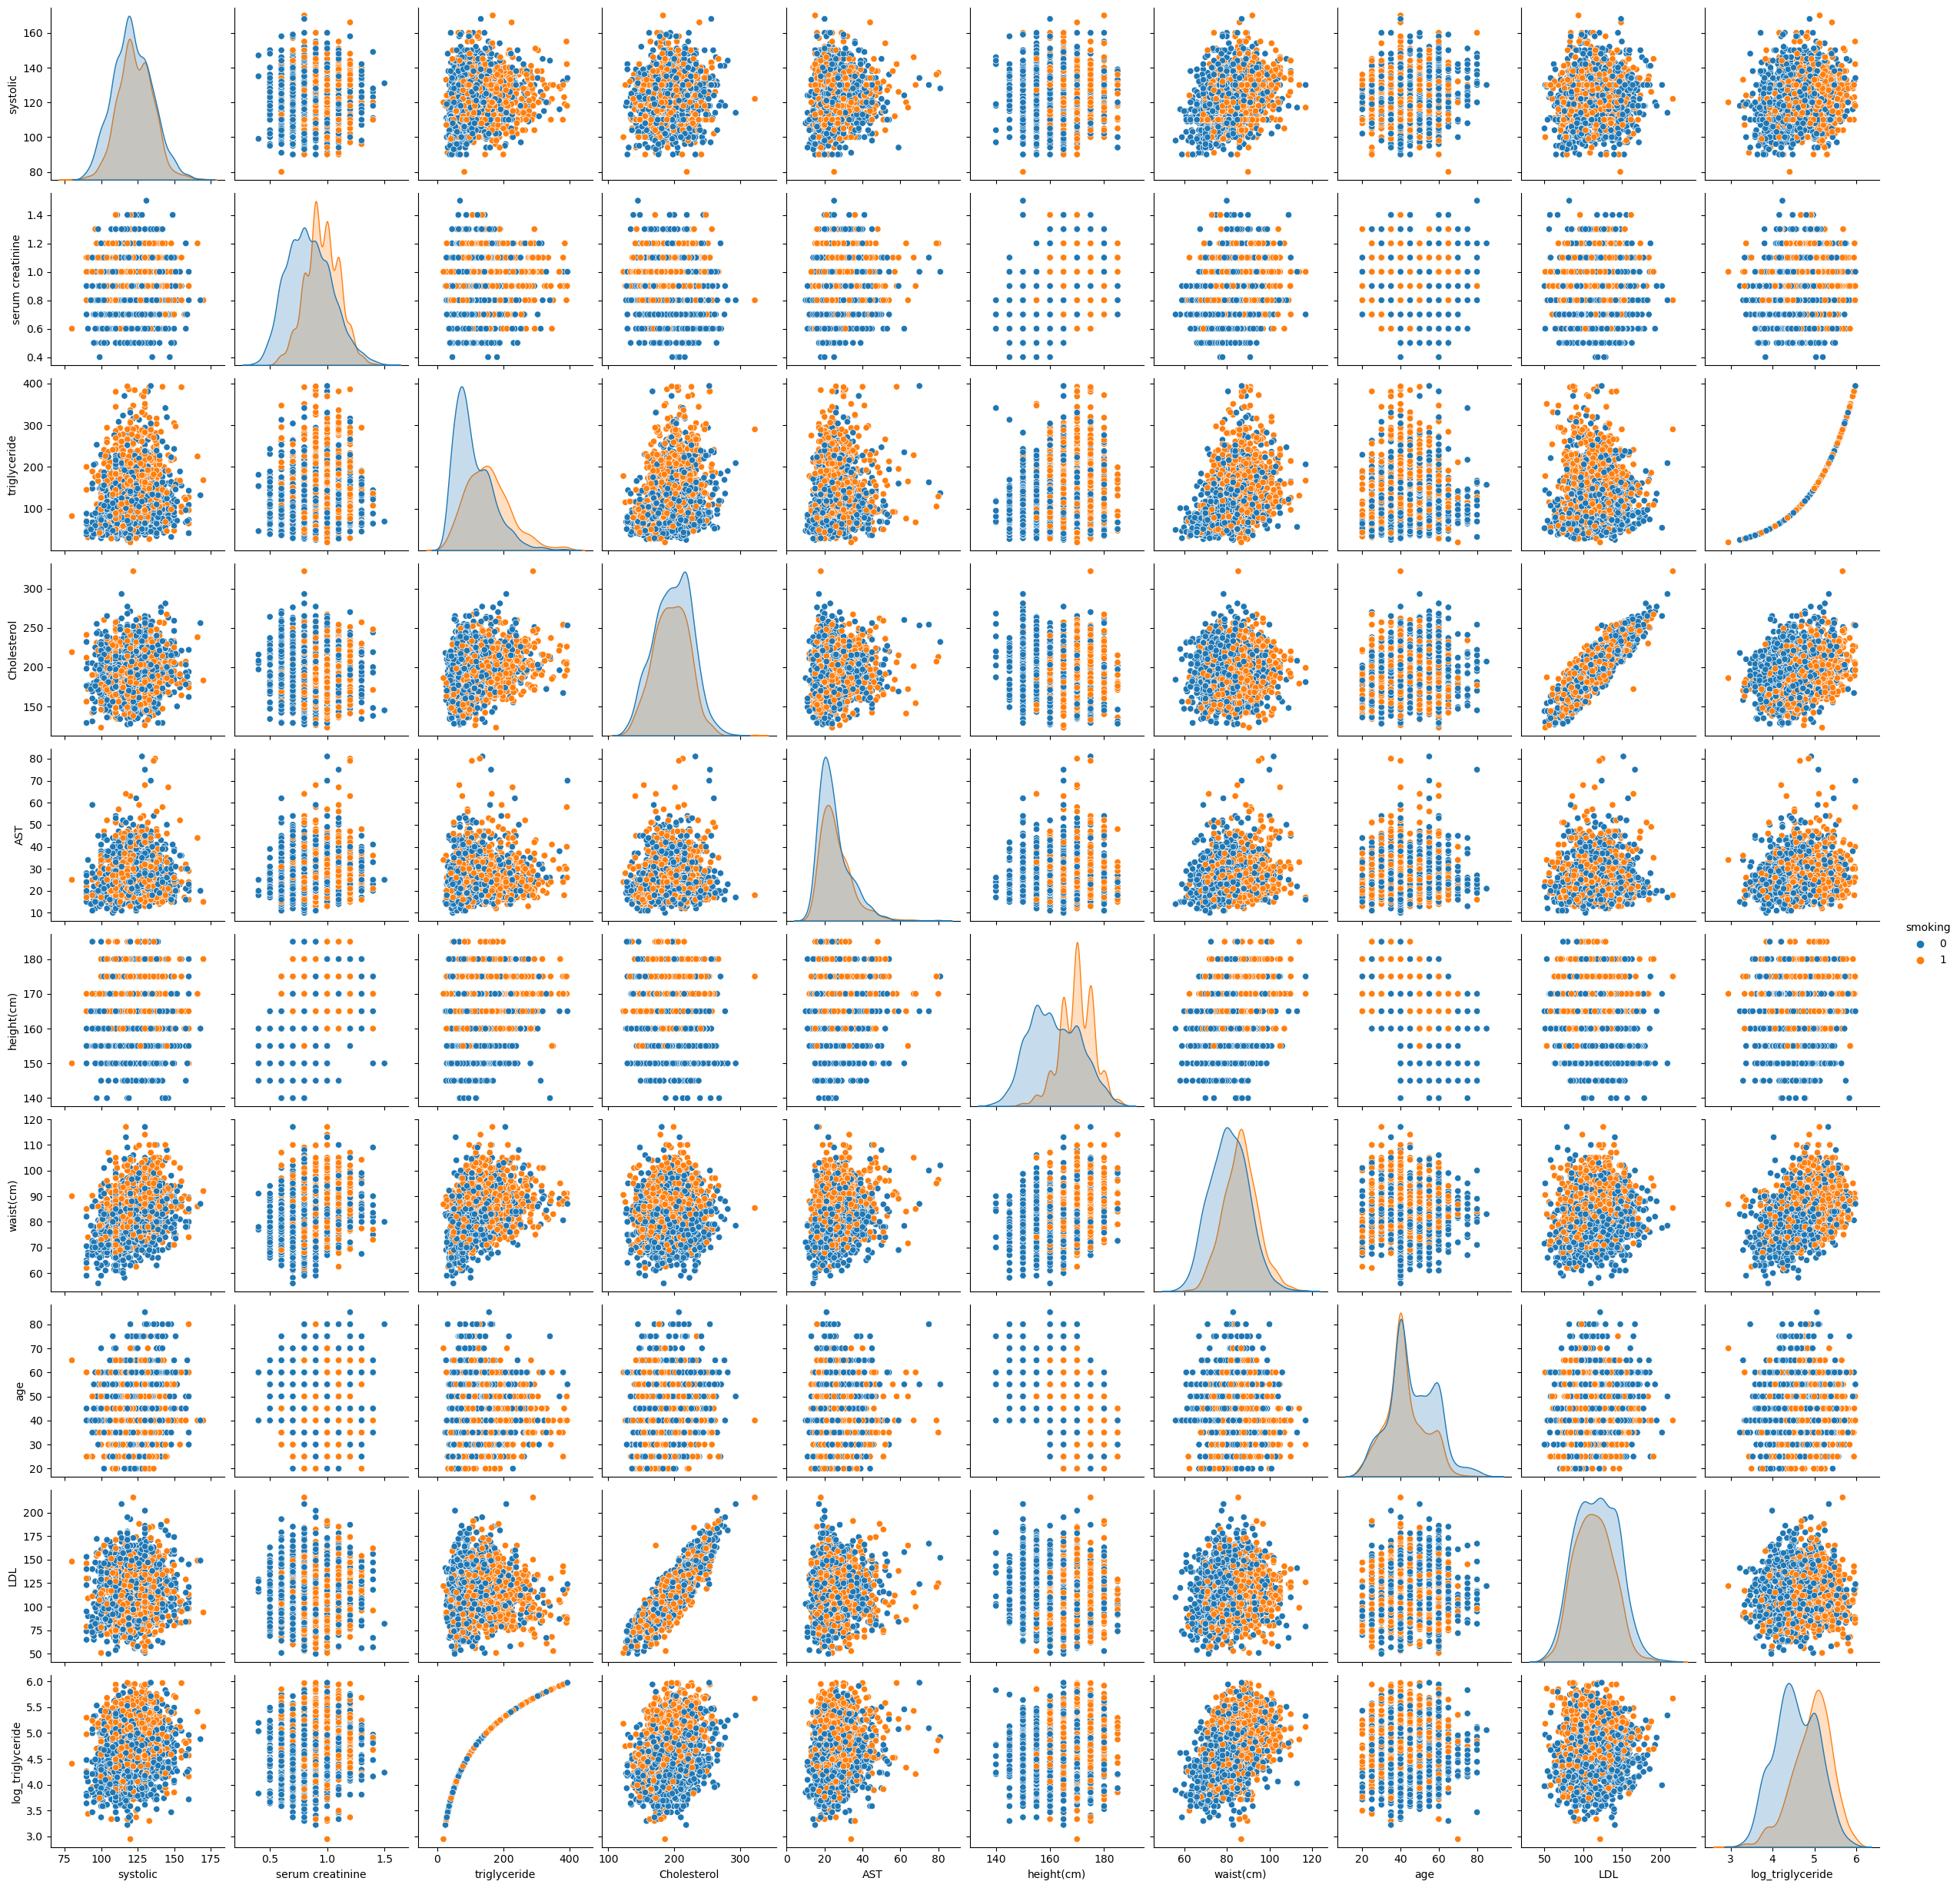

In [21]:
subset_data = data.sample(n=2000)
plt.figure(figsize=(30, 30))
sns.pairplot(subset_data.drop(subset_data.columns[0], axis=1), hue='smoking')
plt.show()

<h3>feature selection</h3>
<p>information gain when ig of a feature increases it decrease uncertainlity</p>

In [33]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.01033687, 0.010933  , 0.05976244, 0.07533281, 0.00816046,
       0.0052918 , 0.13992094, 0.04649141, 0.02306378, 0.01050773])

In [34]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

height(cm)          0.139921
triglyceride        0.075333
serum creatinine    0.059762
waist(cm)           0.046491
age                 0.023064
systolic            0.010933
LDL                 0.010508
eyesight(left)      0.010337
Cholesterol         0.008160
AST                 0.005292
dtype: float64

<Axes: >

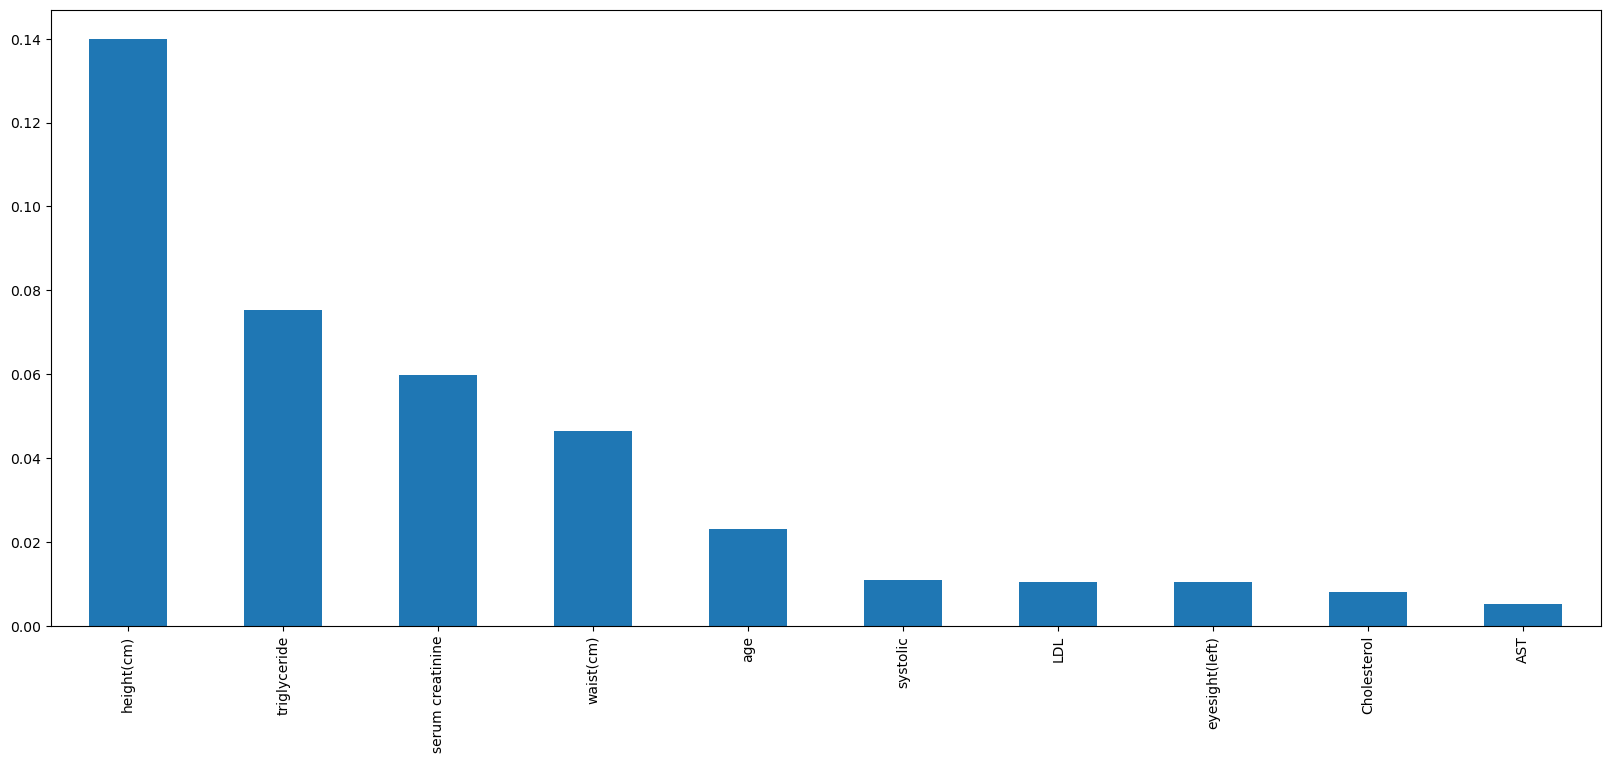

In [35]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [25]:
# height and triglyceride and serum creatinine because they have high information gain

<h2>VarianceThreshold</h2>
<h4>Remove elements with zero variance (constant values)</h4>

In [26]:
from sklearn.feature_selection import VarianceThreshold
variance_obj =  VarianceThreshold(threshold = 0.1)
variance_obj.fit(X_train)

VarianceThreshold(threshold=0.1)

 <h3>See if there are any features with zero variance</h3>
 <h4>True means not ZERO variance and False means ZERO variance and we should drop it</h4>

In [27]:
arr=variance_obj.get_support()
for i in range(X_train.shape[1]):
    if arr[i]== False:
        print(X_train.columns[i])

serum creatinine
